In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Loading the MNIST data set with samples and splitting it
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing the data (making length = 1)
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Create a neural network model
# Add one flattened input layer for the pixels
# Add two dense hidden layers
# Add one dense output layer for the 10 digits
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

# Compiling and optimizing model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=4)

# Evaluating the model
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

# Saving the model
model.save('handwritten_digits.model')

Epoch 1/4
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2658 - accuracy: 0.9203
Epoch 2/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1108 - accuracy: 0.9656
Epoch 3/4
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0743 - accuracy: 0.9767
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9757
0.08544221520423889
0.9757000207901001


In [ ]:
# Load custom images and predict them
image_number = 1
#/content/drive/MyDrive/digits/digit1.png
while os.path.isfile('/content/drive/MyDrive/digits/digit{}.png'.format(image_number)):
  try:
    img = cv2.imread('/content/drive/MyDrive/digits/digit{}.png'.format(image_number))[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print("The number is {}".format(np.argmax(prediction)))
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    image_number += 1
  except:
    print("Error reading image! Proceeding with next image...")
    image_number += 1

1/1 [==============================] - 0s 94ms/step
The number is 7


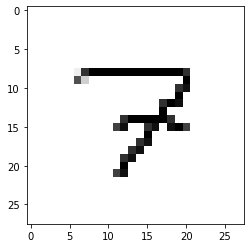

In [ ]:
img = cv2.imread('/content/drive/MyDrive/digits/digit1.png')[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print("The number is {}".format(np.argmax(prediction)))
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()